<a href="https://colab.research.google.com/github/mdarifahammedreza/Data-Science-practice/blob/main/Analysis_on_Chocolate_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DS 331 Assignment
### **Author** : Md Arif Ahammed Reza
**Id:** 221-35-951

Github : [Source Code](https://github.com/mdarifahammedreza/Data-Science-practice/blob/main/Analysis_on_Chocolate_Sales.ipynb)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data loading and preprocessing

In [6]:
df_choc = pd.read_csv("/content/sample_data/Chocolate Sales.csv")


In [7]:
df_choc.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


## Data Exploration

In [8]:
df_choc.shape

(1094, 6)

In [9]:
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


## Data Transformation

In [10]:
#change type and format of Date Column
df_choc['Date'] = pd.to_datetime(df_choc['Date'], format='%d-%b-%y')

#Remove "$" and "," and "spaces" and change type into float of Amount Column
df_choc['Amount'] = df_choc['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

In [11]:
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [12]:
df_choc.sample(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
352,Gunar Cockshoot,Australia,Drinking Coco,2022-01-14,2317.0,195
506,Roddy Speechley,UK,70% Dark Bites,2022-03-24,1421.0,284
932,Ches Bonnell,India,50% Dark Bites,2022-04-15,11298.0,313
380,Mallorie Waber,UK,Milk Bars,2022-01-10,3563.0,284
292,Dennison Crosswaite,USA,Fruit & Nut Bars,2022-05-04,1414.0,318


In [13]:
df_choc.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [14]:
df_choc.duplicated().sum()

np.int64(0)

# 2. Expolatory Data analysis

##  Total Sales by Country

<ipython-input-26-bf3928384d35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= country_sales, x='Amount', y='Country', palette='Reds')


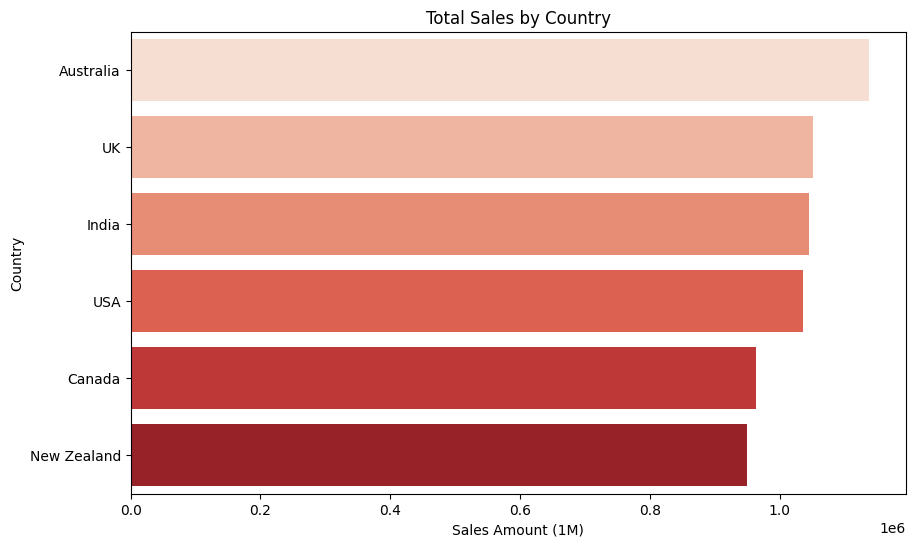

In [26]:
country_sales = df_choc.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data= country_sales, x='Amount', y='Country', palette='Reds')
plt.title('Total Sales by Country')
plt.xlabel('Sales Amount (1M)')
plt.ylabel('Country')
plt.show()

## Salesperson Performance


<ipython-input-24-f30c298ddbd8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_salespeople, x='Amount', y='Sales Person', palette='Greens')


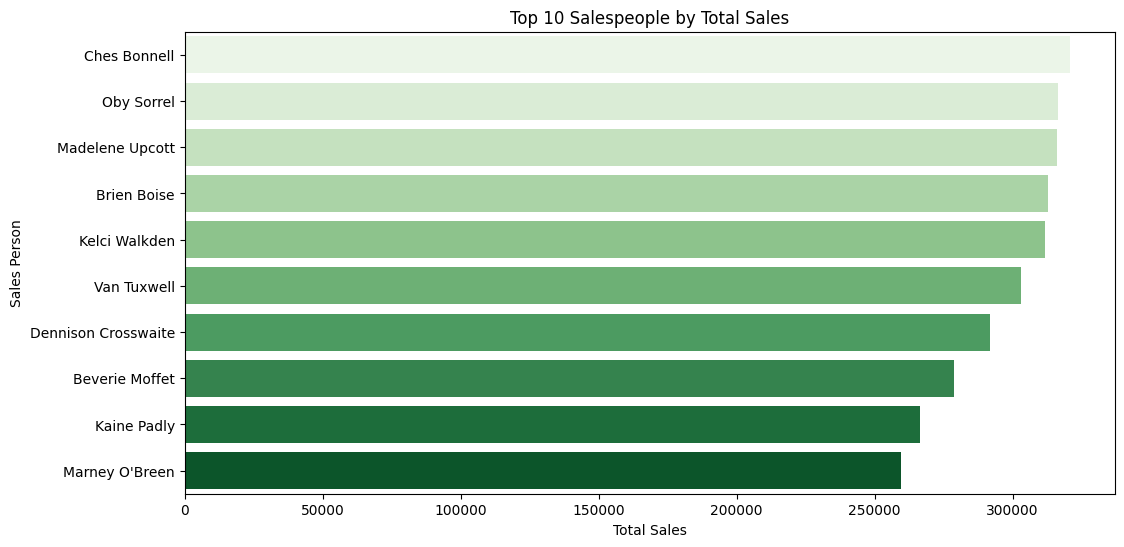

In [24]:
top_salespeople = df_choc.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_salespeople, x='Amount', y='Sales Person', palette='Greens')
plt.title('Top 10 Salespeople by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sales Person')
plt.show()

##  Product Sales Trends

<ipython-input-29-22fa23b0f51f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x='Amount', y='Product', palette='Oranges')


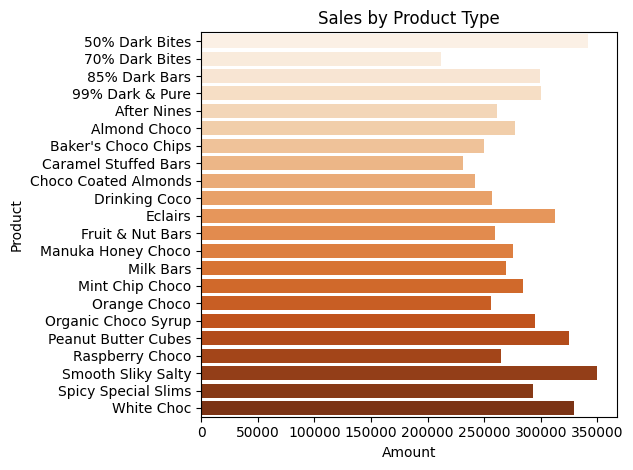

In [29]:
product_sales = df_choc.groupby('Product')['Amount'].sum().reset_index()
sns.barplot(data=product_sales, x='Amount', y='Product', palette='Oranges')
plt.title('Sales by Product Type')
plt.tight_layout()
plt.show()


###  Monthly Trends

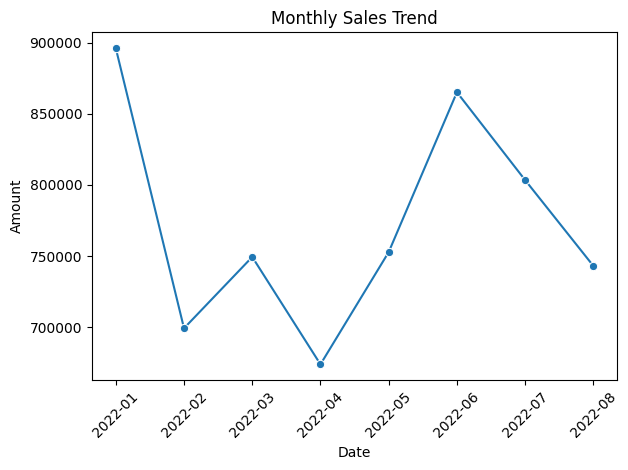

In [31]:
monthly_sales = df_choc.groupby(df_choc['Date'].dt.to_period("M"))['Amount'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].astype(str)
sns.lineplot(data=monthly_sales, x='Date', y='Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 ## Total Boxes Shipped by Country

<ipython-input-18-37411988d106>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_boxes, y='Boxes Shipped', x='Country', palette='magma')


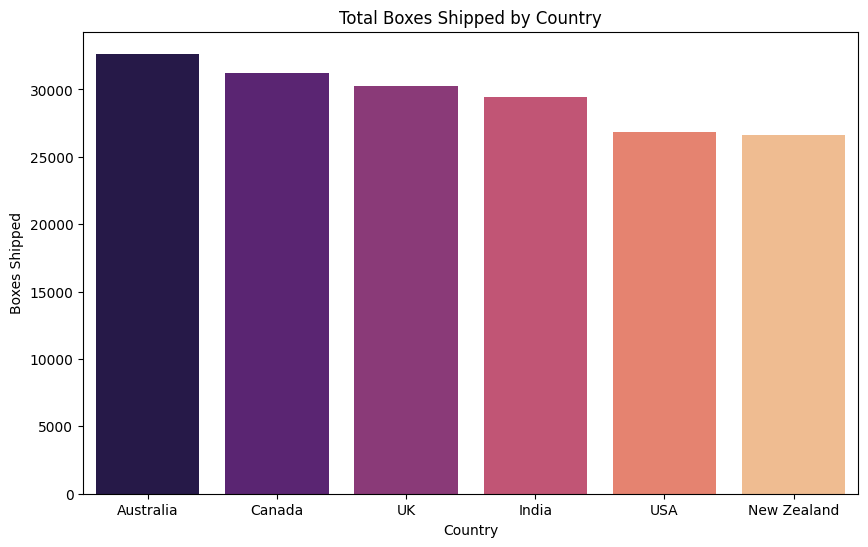

In [18]:
country_boxes = df_choc.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_boxes, y='Boxes Shipped', x='Country', palette='magma')
plt.title('Total Boxes Shipped by Country')
plt.xlabel('Country')
plt.ylabel('Boxes Shipped')
plt.show()

##  Product Sales Distribution

<ipython-input-19-e4d5c3bd28e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_choc, x='Product', y='Amount', palette='Set2')


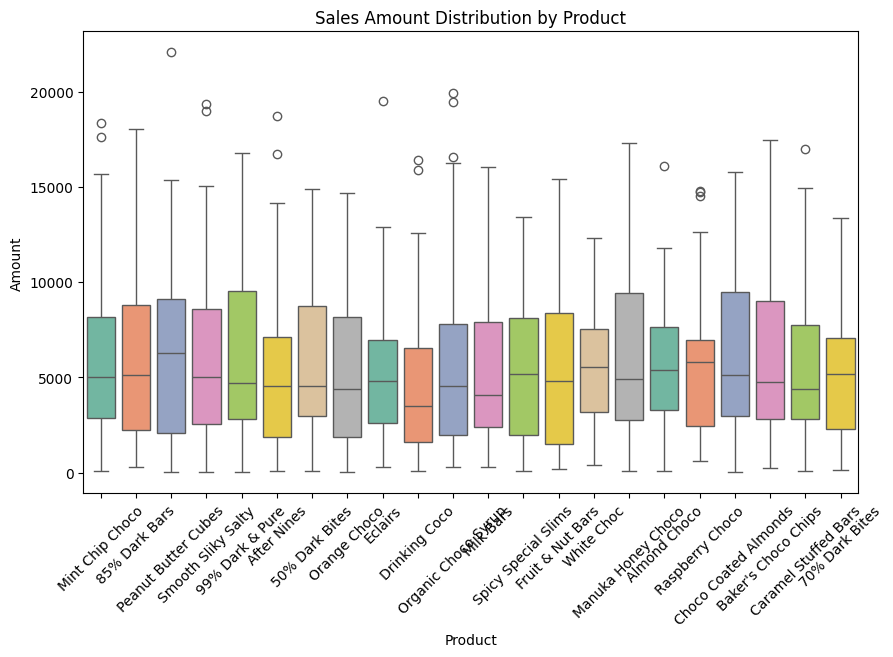

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_choc, x='Product', y='Amount', palette='Set2')
plt.title('Sales Amount Distribution by Product')
plt.xticks(rotation=45)
plt.show()

##  Sales Distribution per Salesperson

<ipython-input-20-3a5385532b9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_choc, x='Sales Person', y='Amount', palette='Set3')


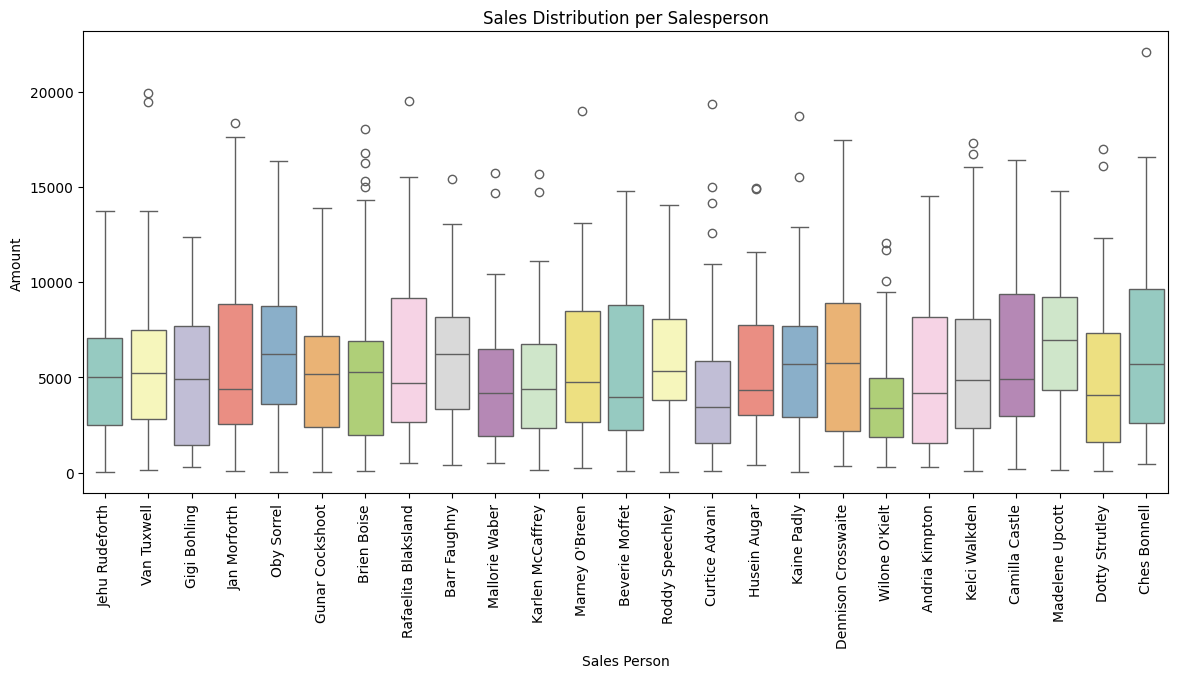

In [20]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_choc, x='Sales Person', y='Amount', palette='Set3')
plt.title('Sales Distribution per Salesperson')
plt.xticks(rotation=90)
plt.show()

## (g) Boxes Shipped vs. Amount

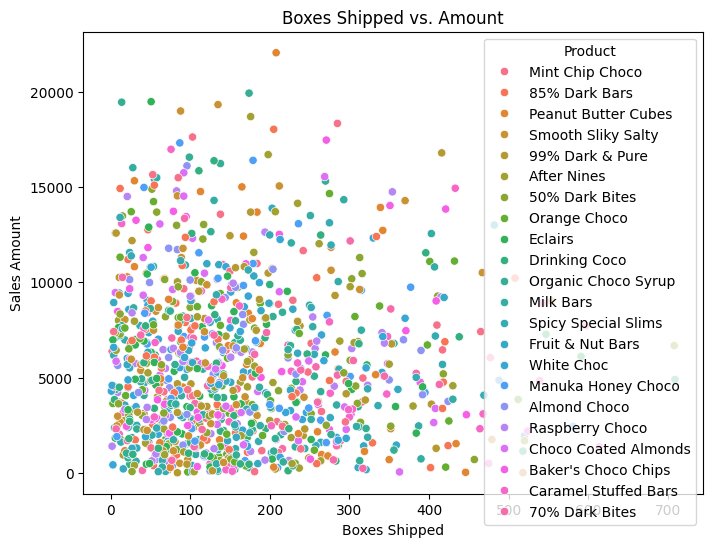

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_choc, x='Boxes Shipped', y='Amount', hue='Product')
plt.title('Boxes Shipped vs. Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.show()

## (h) Sales Heatmap by Country & Product

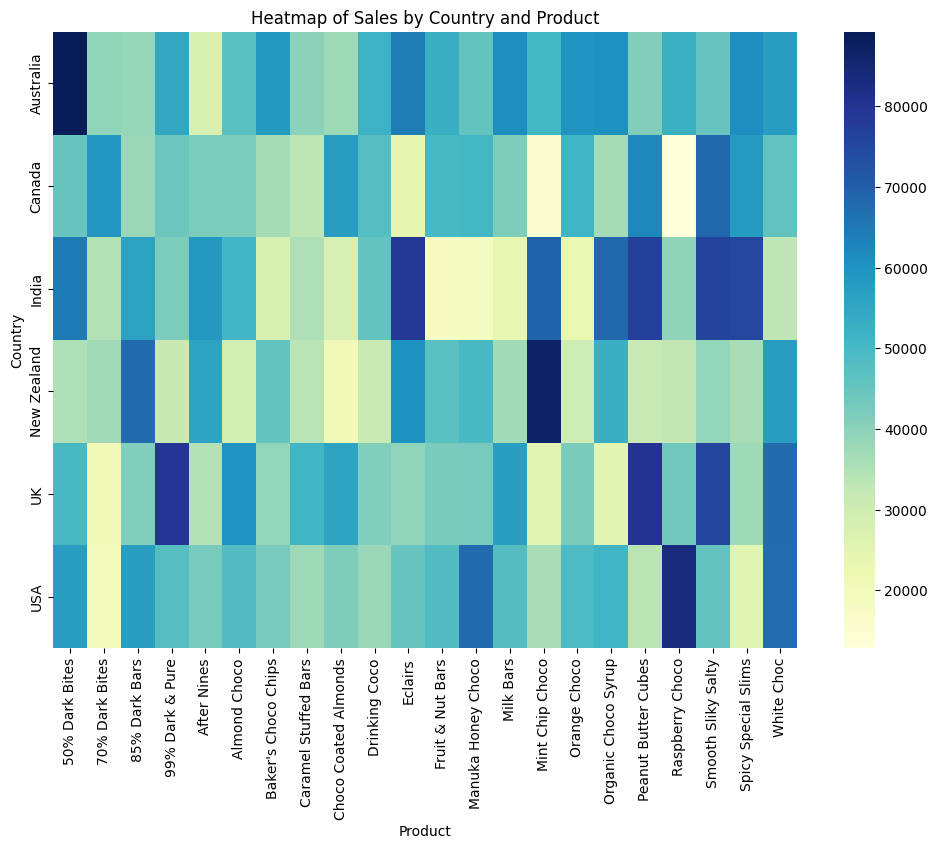

In [22]:
pivot = df_choc.pivot_table(index='Country', columns='Product', values='Amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.show()

# Predictive **Modeling**
### Using linear regression

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Encode categorical columns
df_choc['Country_Code'] = LabelEncoder().fit_transform(df_choc['Country'])
df_choc['Product_Code'] = LabelEncoder().fit_transform(df_choc['Product'])

# Features and target
X = df_choc[['Boxes Shipped', 'Country_Code', 'Product_Code']]
y = df_choc['Amount']

# Train-test split and model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

# Model performance
score = model.score(X_test, y_test)
print(f"R² Score: {score:.2f}")


R² Score: -0.01


Using Random Forest with one hot encoding

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


df_encoded = pd.get_dummies(df_choc, columns=['Country', 'Product', 'Sales Person'], drop_first=True)


X = df_encoded.drop(columns=['Amount', 'Date'])
y = df_encoded['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.9666239047383798


### Feature Importance Plot

<ipython-input-43-c286891f0a48>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')


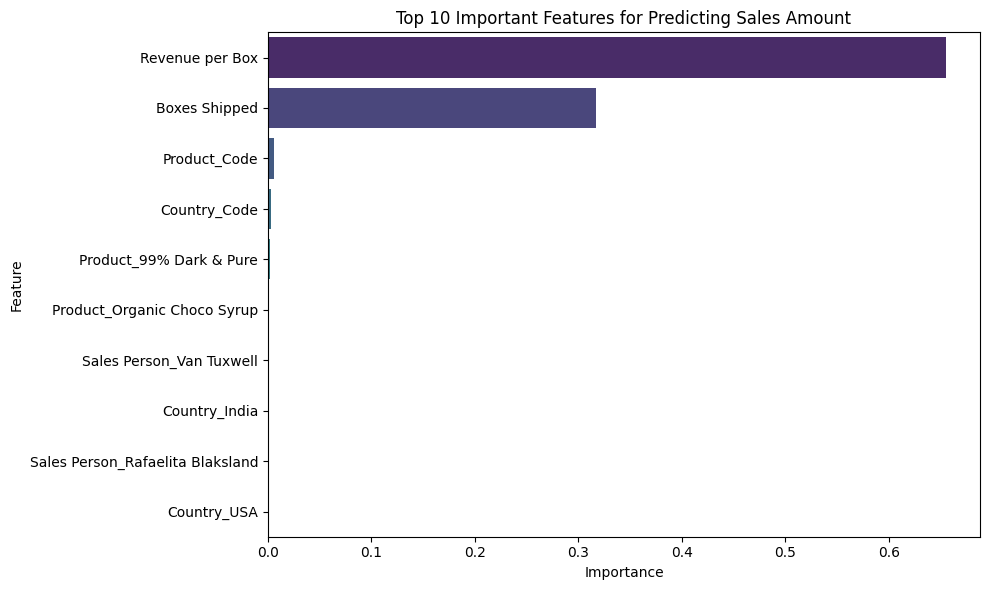

In [43]:


# Get feature importance
importances = rf.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features for Predicting Sales Amount')
plt.tight_layout()
plt.show()


### Actual vs Predicted Visualization

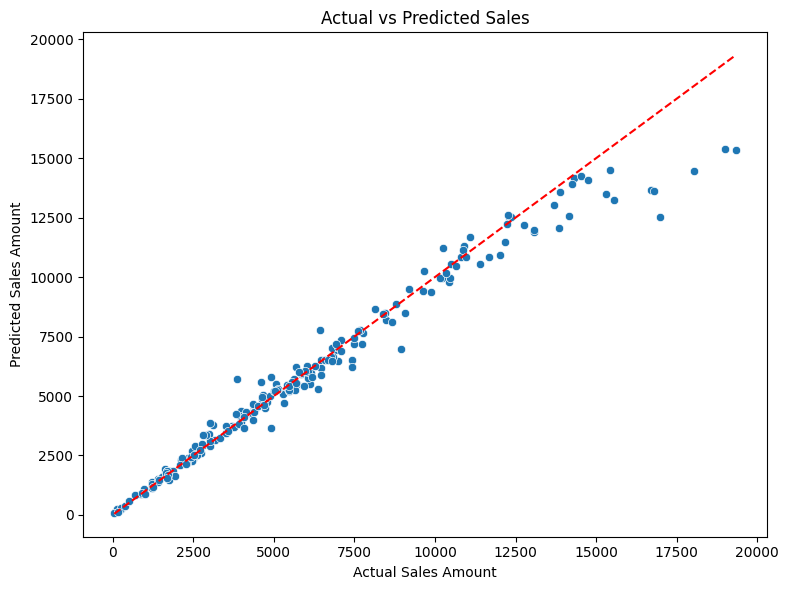

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Sales Amount')
plt.ylabel('Predicted Sales Amount')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()

*`Using Random Forests and engineered features (month, product, country, salesperson), our model achieved an R² of 0.96, indicating a highly accurate understanding of sales behavior in the chocolate industry.`*